In [1]:
import json

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

with open("./data/yelp_academic_dataset_review.json", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]
print(data.__class__)
print(data[0].keys())
print(data[0]["stars"])
print(data[1]["stars"])
# print(data)
texts = [d["text"] for d in data]
labels = [1 if d["stars"] >= 4 else 0 for d in data]  # 4-5星為正評，1-2星為負評
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)
print(len(X_train))
print(len(X_test))

2025-03-30 12:01:28.237668: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 12:01:28.251866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743307288.267574   36734 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743307288.272836   36734 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743307288.289100   36734 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

<class 'list'>
dict_keys(['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type', 'business_id'])
5
5
183925
45982


In [2]:
vocab_size = 10000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(
    X_train_seq, maxlen=max_length, padding="post", truncating="post"
)
X_test_pad = pad_sequences(
    X_test_seq, maxlen=max_length, padding="post", truncating="post"
)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train_pad.shape)
print(X_test_pad.shape)

(183925, 200)
(45982, 200)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 230s 79ms/step - accuracy: 0.6783 - loss: 0.6243 - val_accuracy: 0.6891 - val_loss: 0.6191
Epoch 2/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 269s 81ms/step - accuracy: 0.6795 - loss: 0.6247 - val_accuracy: 0.6792 - val_loss: 0.6203
Epoch 3/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 263s 82ms/step - accuracy: 0.6927 - loss: 0.6105 - val_accuracy: 0.6882 - val_loss: 0.6148
Epoch 4/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 265s 83ms/step - accuracy: 0.7018 - loss: 0.6038 - val_accuracy: 0.6967 - val_loss: 0.6078
Epoch 5/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 252s 79ms/step - accuracy: 0.7101 - loss: 0.5938 - val_accuracy: 0.7048 - val_loss: 0.6073
Epoch 6/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 262s 79ms/step - accuracy: 0.7032 - loss: 0.6001 - val_accuracy: 0.6755 - val_loss: 0.6248
Epoch 7/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 234s 82ms/step - accuracy: 0.6866 - loss: 0.6170 - val_accuracy: 0.6761 - val_loss: 0.6277
Epoch 8/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 227s 79ms/step - accuracy: 

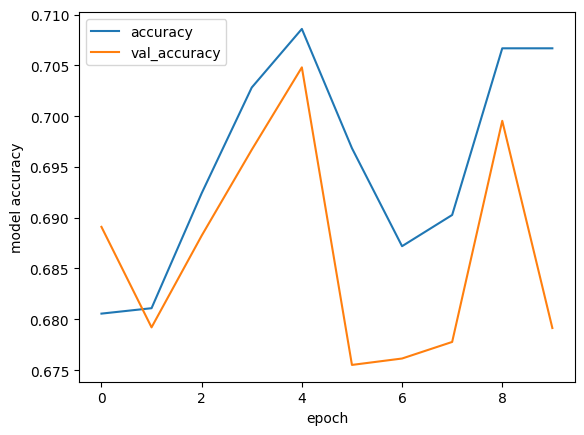

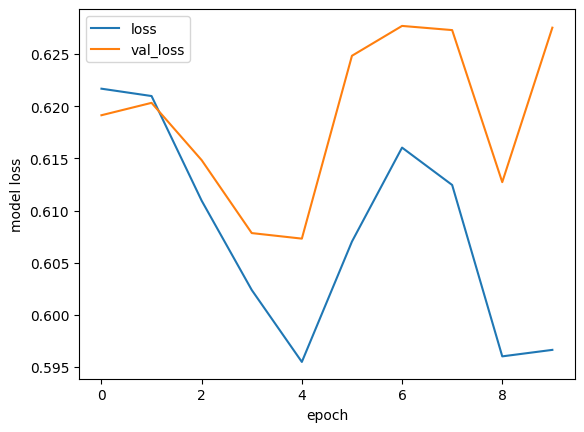

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
正評
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
正評


In [ ]:
# 模型規劃與編譯 ->後續會做替換
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
        tf.keras.layers.SimpleRNN(64, return_sequences=False),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# 訓練與圖表顯示
epochs = 10
batch_size = 64
history = model.fit(
    X_train_pad,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_pad, y_test),
)
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.ylabel("model accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.ylabel("model loss")
plt.xlabel("epoch")
plt.legend()
plt.show()


# 預測
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    pad_seq = pad_sequences(seq, maxlen=max_length, padding="post", truncating="post")
    prediction = model.predict(pad_seq)
    return "正評" if prediction[0][0] > 0.5 else "負評"


print(predict_review("The food was terrible, I will never come back!"))
print(predict_review("Amazing experience, the staff was very friendly."))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 569s 196ms/step - accuracy: 0.6754 - loss: 0.6359 - val_accuracy: 0.6775 - val_loss: 0.6302
Epoch 2/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 639s 202ms/step - accuracy: 0.6797 - loss: 0.6287 - val_accuracy: 0.6775 - val_loss: 0.6260
Epoch 3/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 617s 201ms/step - accuracy: 0.6829 - loss: 0.6198 - val_accuracy: 0.6775 - val_loss: 0.6282
Epoch 4/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 623s 201ms/step - accuracy: 0.6805 - loss: 0.6224 - val_accuracy: 0.6775 - val_loss: 0.6246
Epoch 5/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 618s 200ms/step - accuracy: 0.6816 - loss: 0.6216 - val_accuracy: 0.6777 - val_loss: 0.6204
Epoch 6/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 627s 202ms/step - accuracy: 0.6766 - loss: 0.6236 - val_accuracy: 0.6777 - val_loss: 0.6234
Epoch 7/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 631s 205ms/step - accuracy: 0.6871 - loss: 0.6135 - val_accuracy: 0.6775 - val_loss: 0.6219
Epoch 8/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 611s 201ms/step - ac

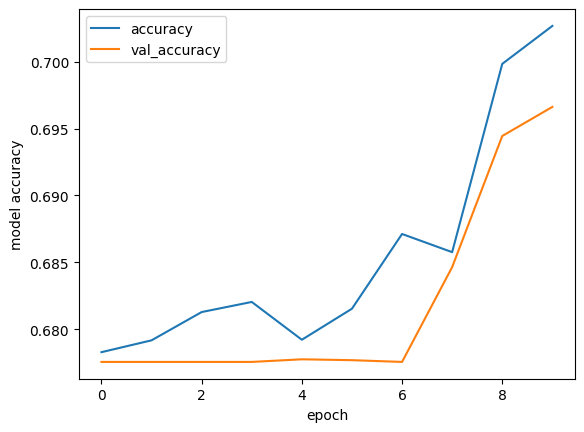

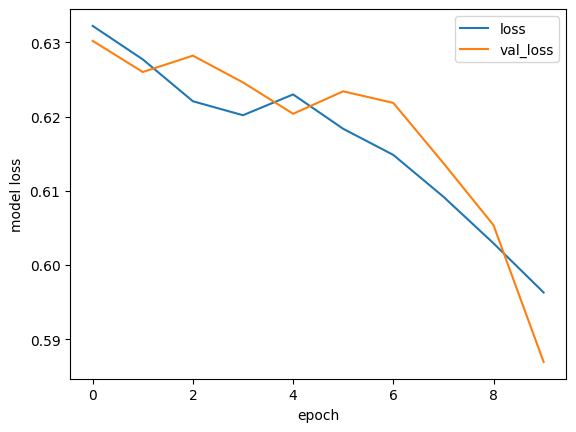

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
正評
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
正評


In [ ]:
# 模型規劃與編譯 ->後續會做替換 :兩層
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
        tf.keras.layers.SimpleRNN(128, return_sequences=True),
        tf.keras.layers.SimpleRNN(64, return_sequences=False),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# 訓練與圖表顯示
epochs = 10
batch_size = 64
history = model.fit(
    X_train_pad,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_pad, y_test),
)
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.ylabel("model accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.ylabel("model loss")
plt.xlabel("epoch")
plt.legend()
plt.show()


# 預測
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    pad_seq = pad_sequences(seq, maxlen=max_length, padding="post", truncating="post")
    prediction = model.predict(pad_seq)
    return "正評" if prediction[0][0] > 0.5 else "負評"


print(predict_review("The food was terrible, I will never come back!"))
print(predict_review("Amazing experience, the staff was very friendly."))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1561s 541ms/step - accuracy: 0.7006 - loss: 0.5728 - val_accuracy: 0.7449 - val_loss: 0.5205
Epoch 2/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1608s 550ms/step - accuracy: 0.7531 - loss: 0.5069 - val_accuracy: 0.7109 - val_loss: 0.5494
Epoch 3/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1535s 534ms/step - accuracy: 0.7429 - loss: 0.5112 - val_accuracy: 0.7246 - val_loss: 0.5341
Epoch 4/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1596s 539ms/step - accuracy: 0.7555 - loss: 0.4945 - val_accuracy: 0.7125 - val_loss: 0.5550
Epoch 5/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1587s 540ms/step - accuracy: 0.7744 - loss: 0.4769 - val_accuracy: 0.7667 - val_loss: 0.5162
Epoch 6/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1601s 547ms/step - accuracy: 0.7830 - loss: 0.4762 - val_accuracy: 0.7815 - val_loss: 0.4871
Epoch 7/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1584s 551ms/step - accuracy: 0.7829 - loss: 0.4646 - val_accuracy: 0.7833 - val_loss: 0.4751
Epoch 8/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 1638s 550ms/s

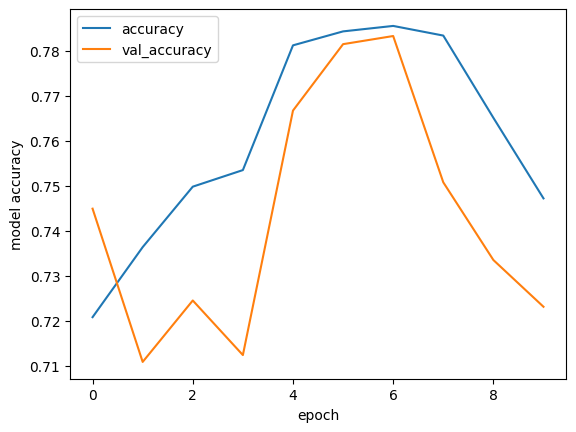

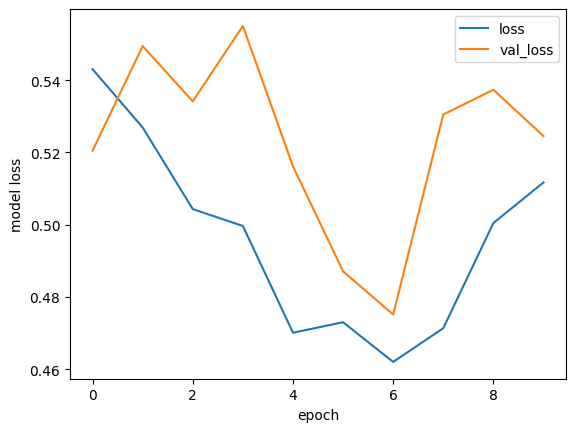

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
負評
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
正評


In [4]:
# 模型規劃與編譯 ->後續會做替換 :雙向

from tensorflow.keras.layers import Bidirectional, Dense, Embedding, SimpleRNN

model = tf.keras.Sequential(
    [
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(SimpleRNN(128, return_sequences=True)),
        Bidirectional(SimpleRNN(64, return_sequences=False)),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# 訓練與圖表顯示
epochs = 10
batch_size = 64
history = model.fit(
    X_train_pad,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_pad, y_test),
)
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.ylabel("model accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.ylabel("model loss")
plt.xlabel("epoch")
plt.legend()
plt.show()


# 預測
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    pad_seq = pad_sequences(seq, maxlen=max_length, padding="post", truncating="post")
    prediction = model.predict(pad_seq)
    return "正評" if prediction[0][0] > 0.5 else "負評"


print(predict_review("The food was terrible, I will never come back!"))
print(predict_review("Amazing experience, the staff was very friendly."))